# Water Pumps: EDA
**Plan:**
1. Relationships between date recorded and geographical location.
2. Relations between groups of categorical data.
3. Distributions of numerical data.

In [1]:
from collections import defaultdict

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
pd.__version__

'1.1.3'

In [3]:
sns.__version__

'0.11.0'

## Load Cleaned Data

In [4]:
df = pd.read_csv('../data/clean/cleaned_data.csv', index_col='id')

In [5]:
df.head()

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
0,non functional,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,functional,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59364 non-null  object 
 1   amount_tsh             59364 non-null  float64
 2   date_recorded          59364 non-null  object 
 3   funder                 59364 non-null  object 
 4   gps_height             59364 non-null  int64  
 5   installer              59364 non-null  object 
 6   longitude              59364 non-null  float64
 7   latitude               59364 non-null  float64
 8   wpt_name               59364 non-null  object 
 9   num_private            59364 non-null  int64  
 10  basin                  59364 non-null  object 
 11  subvillage             59364 non-null  object 
 12  region                 59364 non-null  object 
 13  region_code            59364 non-null  int64  
 14  district_code          59364 non-null  int64  
 15  lg

## EDA

### Dates and Geographical location
As indicated during data wrangling, it appears that the geographical locations were recorded twice. I will investigate on whether there is a relationship between when the record was made and the location.

In [7]:
geo_columns = ['longitude', 'latitude']
for column in geo_columns:
    print(df[column].value_counts().to_frame()[column].value_counts())

1       57443
2          72
1777        1
Name: longitude, dtype: int64
1       57445
2          71
1777        1
Name: latitude, dtype: int64


**Observations:**
* The majority of the geographical locations are unique.
* 71 geographical locations are recorded twice.
    * Could these pumps have been recorded on different days?
* One geographical location was recorded 1777 times.
    * This seems suspicious and is worth investigating.

In [8]:
geo_columns = ['longitude', 'latitude']
for column in geo_columns:
    print(df[column].value_counts().to_frame())

           longitude
0.000000        1777
33.010510          2
39.095087          2
39.099069          2
39.085965          2
...              ...
31.789709          1
37.095085          1
39.183964          1
34.341160          1
35.256844          1

[57516 rows x 1 columns]
               latitude
-2.000000e-08      1777
-2.465246e+00         2
-6.957328e+00         2
-6.991294e+00         2
-2.490324e+00         2
...                 ...
-3.263586e+00         1
-9.564592e+00         1
-8.519241e+00         1
-9.342734e+00         1
-2.598965e+00         1

[57517 rows x 1 columns]


**Question:** Do these geographical coordinates even fall within the borders of Tanzania?

A Google map inspection reveals that these coordinates fall within the Atlantic Ocean! Therefore, they must have been used to indicate pumps with missing geographical information.

In [9]:
1777 / len(df)

0.0299339667138333

Less than three percent of the pumps are missing geographical locations. This is small, but not insignificant.

### Data types
Inspecting the dataset above reveals that the categorical variable data types were lost when converting the file to a csv file. I will re-add them here.

In [10]:
categorical_vars = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                   'lga', 'ward', 'public_meeting', 'permit', 'construction_year',
                   'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
                   'payment_type', 'water_quality', 'quality_group', 'quantity_group', 'source', 'source_type', 
                    'source_class', 'waterpoint_type', 'waterpoint_type_group', 'scheme_management', 'status_group', 
                   'payment', 'quantity']

In [11]:
categorical_dict = {x: 'category' for x in categorical_vars}

In [12]:
df = df.astype(categorical_dict)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   status_group           59364 non-null  category
 1   amount_tsh             59364 non-null  float64 
 2   date_recorded          59364 non-null  object  
 3   funder                 59364 non-null  category
 4   gps_height             59364 non-null  int64   
 5   installer              59364 non-null  category
 6   longitude              59364 non-null  float64 
 7   latitude               59364 non-null  float64 
 8   wpt_name               59364 non-null  category
 9   num_private            59364 non-null  int64   
 10  basin                  59364 non-null  category
 11  subvillage             59364 non-null  category
 12  region                 59364 non-null  category
 13  region_code            59364 non-null  category
 14  district_code          59364 non-null 

## Distributions of numerical variables
**Plan:**
1. Create list of numerical column names.
2. Plot ECDF plots to visualize distributions. Use subplots.

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [15]:
print(numerical_columns)

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'population'],
      dtype='object')


In [16]:
num_cols_list = numerical_columns.to_list()
print(num_cols_list)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population']


In [17]:
sns.__version__

'0.11.0'

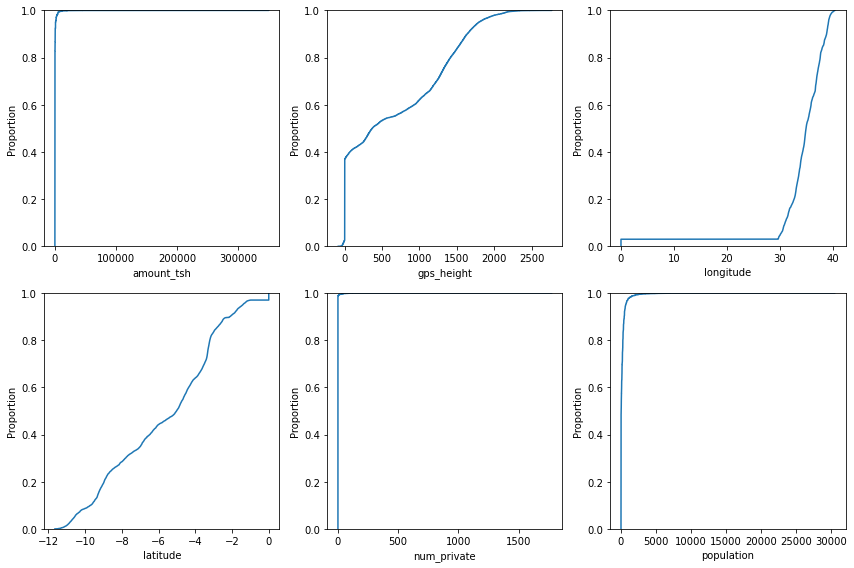

In [18]:
num_cols = 3
num_rows = 2

num_plots = len(num_cols_list)
num_cols = 3
num_rows = num_plots//num_cols

fix, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, column in enumerate(num_cols_list):
    row_i = i // num_cols
    col_i = i % num_cols
    sns.ecdfplot(x=column, data=df, ax=ax[row_i, col_i])
plt.tight_layout()
plt.show()

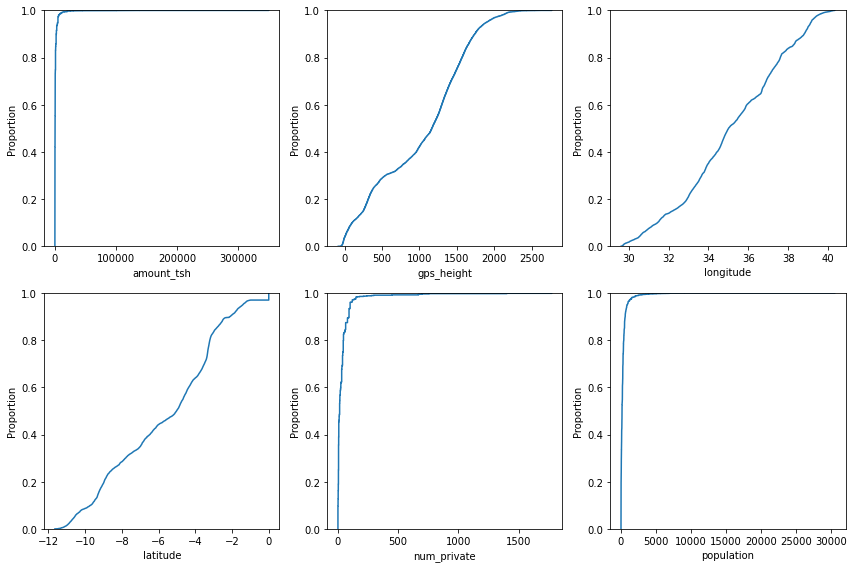

In [19]:
num_cols = 3
num_rows = 2

num_plots = len(num_cols_list)
num_cols = 3
num_rows = num_plots//num_cols

fix, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, column in enumerate(num_cols_list):
    non_zero = df[column] != 0.0
    row_i = i // num_cols
    col_i = i % num_cols
    sns.ecdfplot(x=column, data=df[non_zero], ax=ax[row_i, col_i])
plt.tight_layout()
plt.show()

**Observations:** The variables `amount_tsh`, `num_private`, and `population` show CDFs that are heavily skewed towards zero.

In [20]:
skewed_columns = ['amount_tsh', 'num_private', 'population']

In [21]:
df[skewed_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59364.0,317.843017,2998.473133,0.0,0.0,0.0,20.0,350000.0
num_private,59364.0,0.474429,12.239934,0.0,0.0,0.0,0.0,1776.0
population,59364.0,180.019086,471.604294,0.0,0.0,25.0,215.0,30500.0


One way to deal with these skewed values is to rescale these variables using a log function. I will do this and then relook at the distributions.

In [22]:
for column in skewed_columns:
    df[f'log_{column}'] = np.log(df[column]+1)

In [23]:
log_columns = [f'log_{x}' for x in skewed_columns]

In [24]:
df[log_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
log_amount_tsh,59364.0,1.586196,2.637172,0.0,0.0,0.000000,3.044522,12.765691
log_num_private,59364.0,0.035173,0.341284,0.0,0.0,0.000000,0.000000,7.482682
log_population,59364.0,2.821411,2.662085,0.0,0.0,3.258097,5.375278,10.325515


In [25]:
num_cols_list

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population']

In [26]:
new_num_cols_list = [f'log_{x}' if x in skewed_columns else x for x in num_cols_list]

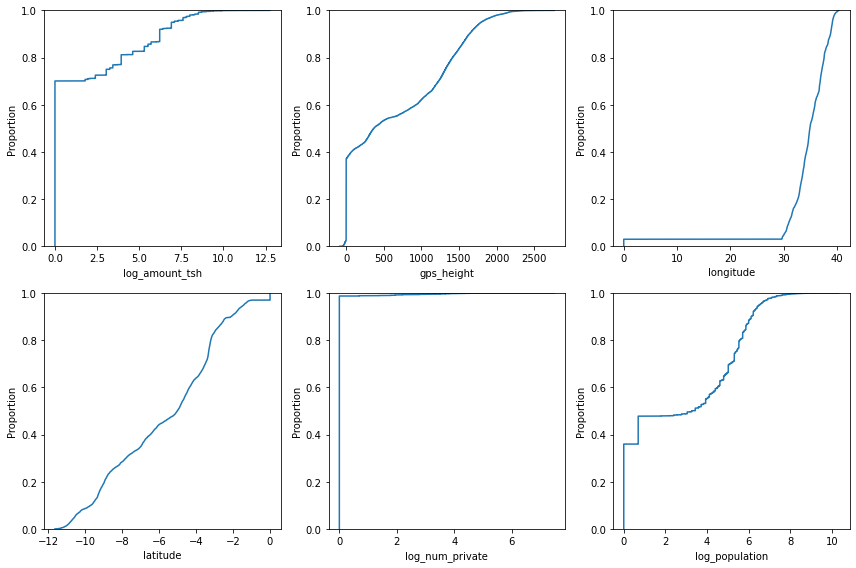

In [27]:
num_cols = 3
num_rows = 2

num_plots = len(new_num_cols_list)
num_cols = 3
num_rows = num_plots//num_cols

fix, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, column in enumerate(new_num_cols_list):
    row_i = i // num_cols
    col_i = i % num_cols
    sns.ecdfplot(x=column, data=df, ax=ax[row_i, col_i])
plt.tight_layout()
plt.show()

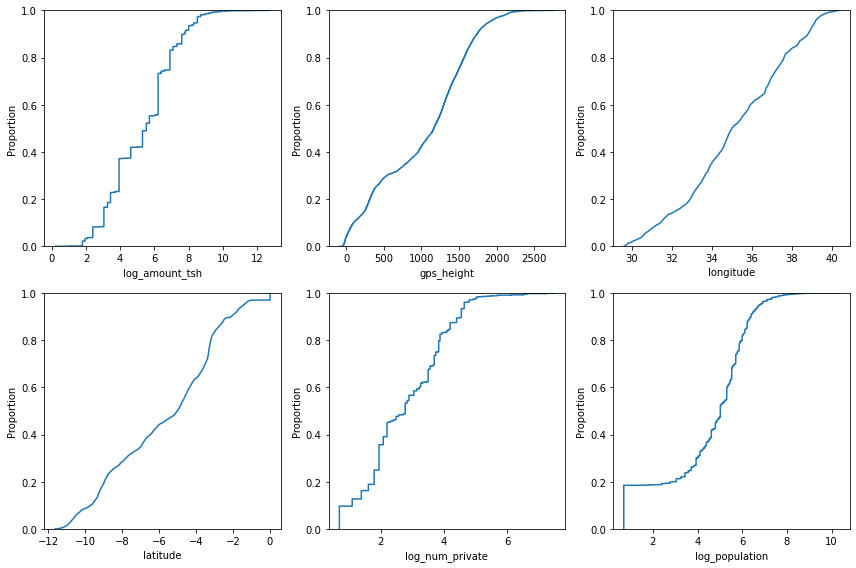

In [28]:
num_cols = 3
num_rows = 2

num_plots = len(new_num_cols_list)
num_cols = 3
num_rows = num_plots//num_cols

fix, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, column in enumerate(new_num_cols_list):
    non_zero = df[column] != 0.0
    row_i = i // num_cols
    col_i = i % num_cols
    sns.ecdfplot(x=column, data=df[non_zero], ax=ax[row_i, col_i])
plt.tight_layout()
plt.show()

In [29]:
df.loc[df['log_population'] != 0, 'log_population'].min()

0.6931471805599453

**Observations:**
That looks much better.
* `log_population`
    * There are many values near zero, but then a nice, normal-looking curve afterwards.
* `log_amount_tsh`
    * A step-wise CDF, starting to increase around 2.
* I also think I only need to consider numerical values that are great than zero. Those that are equal to zero indicate missing values. But, before reaching this conclusion, I need to investigate if there is any relationship between the numerical variables and the response variable and whether the zero values make any difference or not.

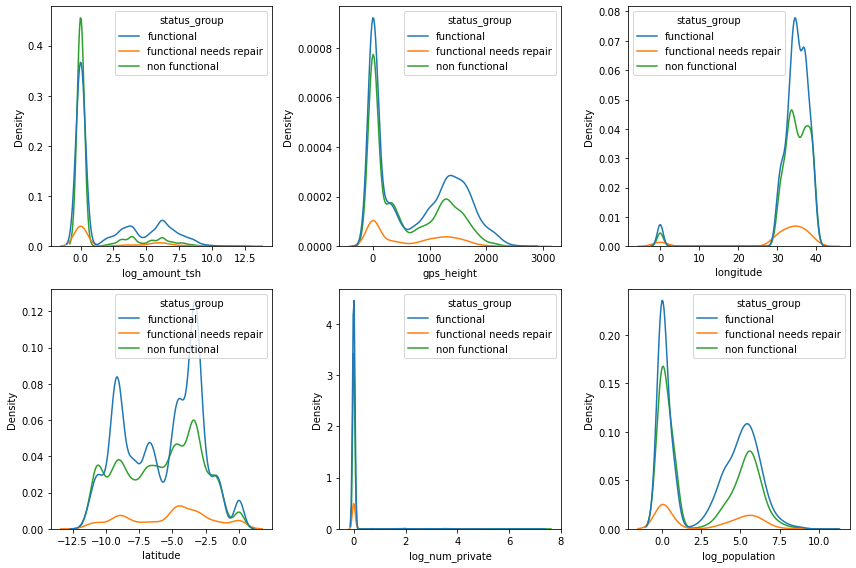

In [30]:
num_cols = 3
num_rows = 2

num_plots = len(new_num_cols_list)
num_cols = 3
num_rows = num_plots//num_cols

fix, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, column in enumerate(new_num_cols_list):
    row_i = i // num_cols
    col_i = i % num_cols
    sns.kdeplot(x=column, hue='status_group', data=df, ax=ax[row_i, col_i])
plt.tight_layout()
plt.show()

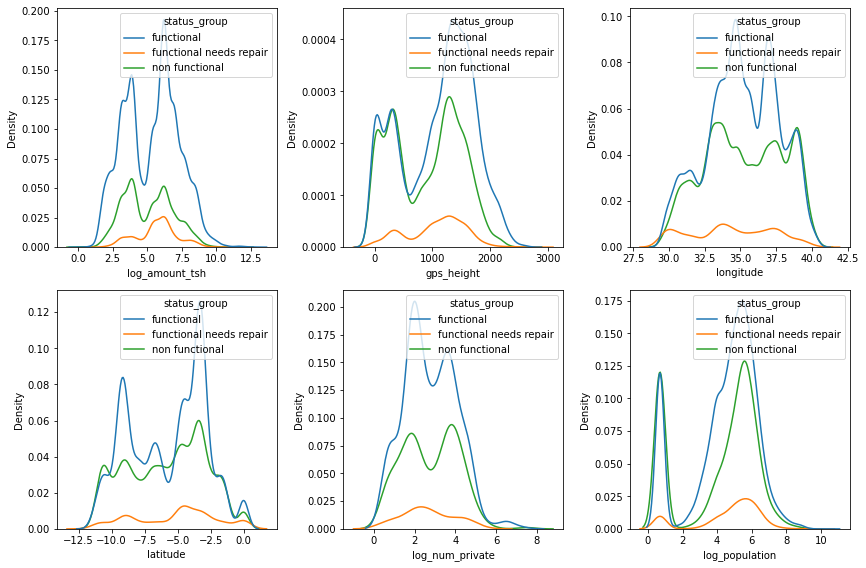

In [31]:
num_cols = 3
num_rows = 2

num_plots = len(new_num_cols_list)
num_cols = 3
num_rows = num_plots//num_cols

fix, ax = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, column in enumerate(new_num_cols_list):
    non_zero = df[column] != 0.0
    row_i = i // num_cols
    col_i = i % num_cols
    sns.kdeplot(x=column, hue='status_group', data=df[non_zero], ax=ax[row_i, col_i])
plt.tight_layout()
plt.show()

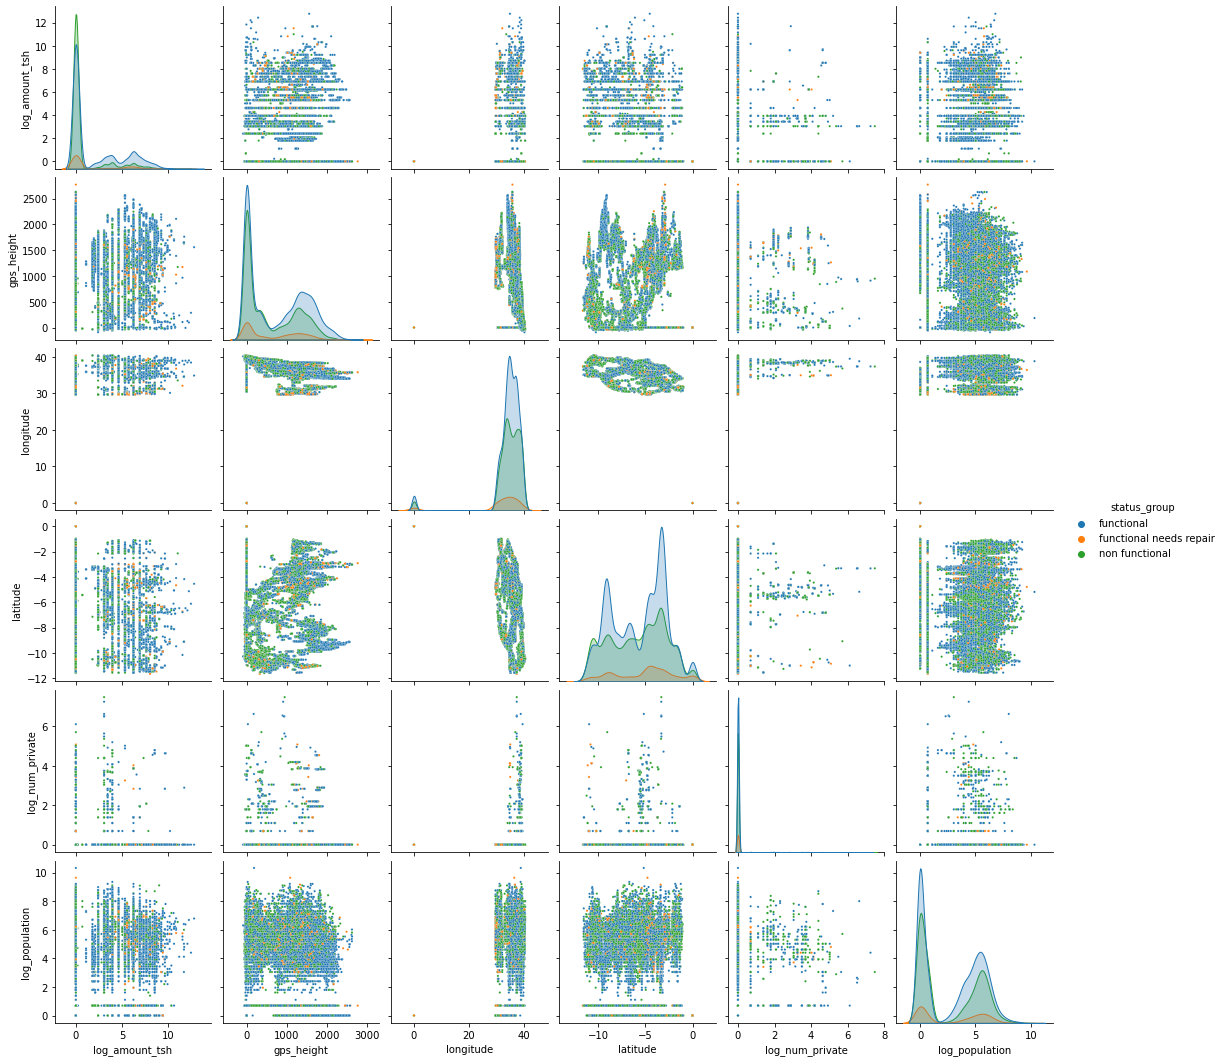

In [32]:
sns.pairplot(df[new_num_cols_list+['status_group']], hue='status_group', plot_kws={"s": 5})
plt.show()

#### Handling zero values
* longitude
    * Set to median value.
* latitude
    * Set to median value.
* gps_height
    * Set to median value of heights within a binned geographical location.
* log_amount_tsh
    * There are a lot of zero values for the variable. This is the amount of water available at that waterpoint. Using the median `log_amount_tsh` value to resample the zero values seem problematic since there are so many zero values. Is it zero because there really isn't water available, or is it due to missing data?
* log_population
    * This exhibits the sample problem as `log_amount_tsh`. But, maybe there are waterpumps in very rural areas.

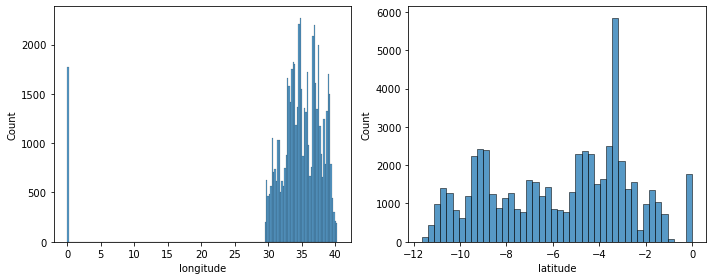

In [33]:
fix, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, column in enumerate(['longitude', 'latitude']):
    sns.histplot(x=column, data=df, ax=ax[i])
plt.tight_layout()
plt.show()

##### Correcting latitude and longitude
**Plan:**
1. Find median values for non-zero latitude/longitude.
2. Set zero latitude/longitude values to median value.

In [34]:
location_columns = ['longitude', 'latitude']
for column in location_columns:
    non_zero = df[column] != 0.0
    median_location = np.median(df.loc[non_zero, column])
    df.loc[~non_zero, column] = median_location

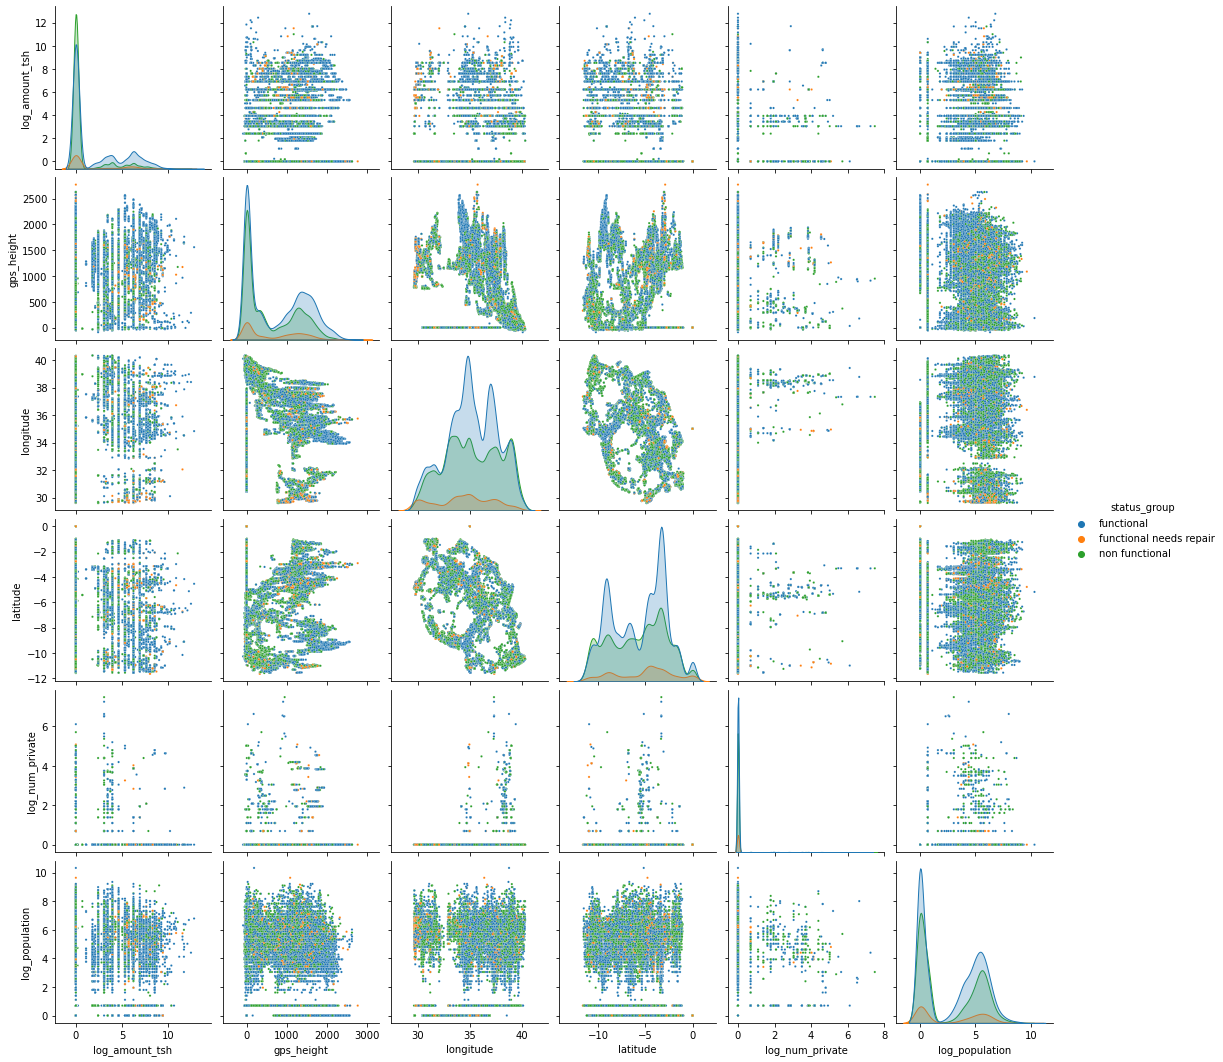

In [35]:
sns.pairplot(df[new_num_cols_list+['status_group']], hue='status_group', plot_kws={"s": 5})
plt.show()

In [36]:
df['eq_distance'] = np.sqrt(df['latitude']**2 + df['longitude']**2)

In [44]:
num_bins = 100
bin_labels = [f'bin_{x}' for x in range(num_bins)]
df['binned_distance'] = pd.cut(df['eq_distance'], bins=num_bins, labels=bin_labels)

In [45]:
print(len(df['binned_distance'].unique()))

100


In [46]:
df['gps_height_corrected'] = df['gps_height']
for distance_bin in df['binned_distance'].unique().sort_values():
    nonzero_heights = (df['binned_distance'] == distance_bin) & (df['gps_height'] != 0)
    if np.sum(nonzero_heights) > 0:
        median_height = np.median(df.loc[nonzero_heights, 'gps_height'])
    zero_heights = (df['binned_distance'] == distance_bin) & (df['gps_height'] == 0)
    if np.sum(zero_heights) > 0:
        df.loc[zero_heights, 'gps_height_corrected'] = median_height
    # df.loc[~zero_heights, 'gps_height_corrected'] = df.loc[~zero_heights, 'gps_height']

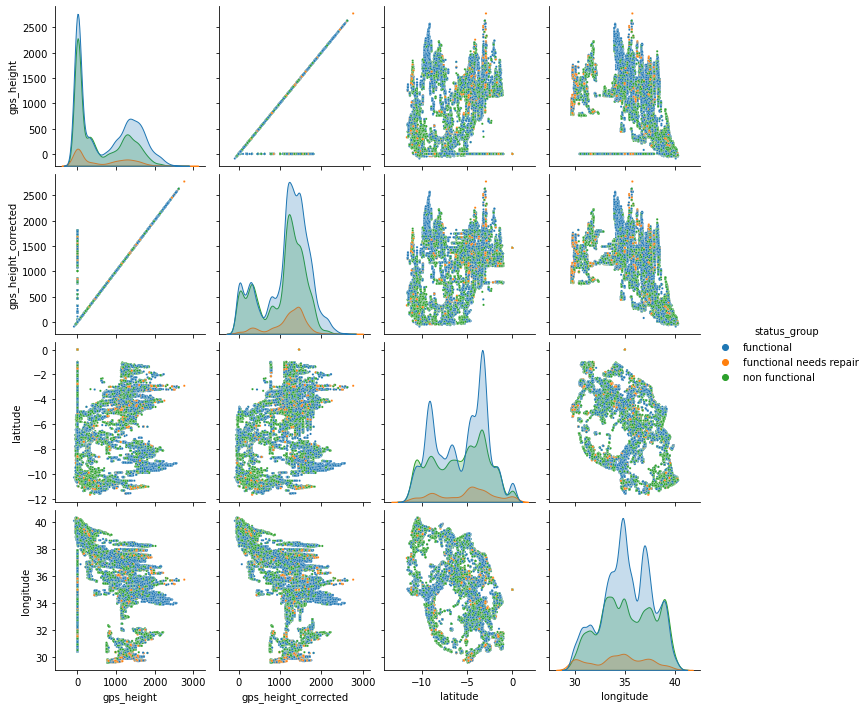

In [47]:
sns.pairplot(df[['gps_height', 'gps_height_corrected', 'latitude', 'longitude', 'status_group']], hue='status_group', plot_kws={"s": 5})
plt.show()